# Retirement Tool


# Retirement Planning Tool

Part 1: Data inputs will be generated to determine the years in retirement, size of current portfolio, and historical growth rates of indices.

Part 2: Users will forecast the performance of their portfolio at the age they wish to retire until they turn 80. Historical price data for 3 years will be used to generate Monte Carlo simulations to compute total savings (mean) for the first year of retirement. We are assuming that it will cost 150,000 per year to retire in NYC or 2.25 million to retire at 65.

Part 3: This total will be exported to the Cost of Living Calculator to determine the list of cities where the user can feasibly retire.

In [19]:
# Import the required libraries and dependencies
import sys
sys.path.insert(0, '..')
import src.simulation as simulation
import src.fileio as fileio

%matplotlib inline

## Load the environment variables from the .env file
load_dotenv("SAMPLE.env")
Step 1: Questionary inputs and "For Loop" to generate list of qualifying cities.

In [20]:
# test data
# retirement_years, years_to_retirement, savings, portfolio_type, total_stocks_bonds = [40, 13, 500000.0, 3, 100000.0]

retirement_years, years_to_retirement, savings, portfolio_type, total_stocks_bonds = fileio.load_csv("../cache/user_data.csv")

retirement_years = int(retirement_years)
years_to_retirement = int(years_to_retirement)
savings = float(savings)
portfolio_type = int(portfolio_type)
total_stocks_bonds = float(total_stocks_bonds)

tickers=["SPY", "AGG"]

Step 2: Use the savings_data list to create a Pandas DataFrame named savings_df, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:
savings_data: Use the list that you just created.

columns: Set this parameter equal to a Python list with a single value called amount.

index: Set this parameter equal to a Python list with the values of crypto and stock/bond.

In [21]:
savings_df = simulation.create_savings_dataframe(savings, total_stocks_bonds)
savings_df

,amount
cash,50000.0
stock/bond,40000.0


Part 2: Create a Financial Planner for Retirement

Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [22]:

df_portfolio = simulation.get_portfolio_dataframe()


# Display both the first and last five rows of the DataFrame
display(df_portfolio.head())
display(df_portfolio.tail())

SPY                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-04-22 04:00:00+00:00  289.17  290.435  289.0700  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.4200  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.0700  292.23  50469550   
2019-04-25 04:00:00+00:00  292.12  292.780  290.7300  292.05  57875137   
2019-04-26 04:00:00+00:00  292.12  293.490  291.2401  293.41  51449173   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-04-22 04:00:00+00:00      170767  290.002934  108.13  108.16  108.05   
2019-04-23 04:00:00+00:00      232023  292.102165  108.18  108.28  108.15   
2019-04-24 04:00:00+00:00      203858  292.580824  108.42  108.53  108.42   
2019-04-25 04:00:00+00:00      238260  292.051720  108.50  108.55  108.42   
2019-04-26 04:00:00+00:00      220594  292.642502  108.74  108.75  108.66   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-04-22 04:00:00+00:00  108.06  5725616        9161  108.098893  
2019-04-23 04:00:00+00:00  108.25  3422712       10779  108.236718  
2019-04-24 04:00:00+00:00  108.50  3000163       10192  108.496809  
2019-04-25 04:00:00+00:00  108.49  2648150        9121  108.473969  
2019-04-26 04:00:00+00:00  108.71  2300074        8664  108.705413

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2022-04-18 04:00:00+00:00  436.73  439.7500  435.61  437.97   65814949   
2022-04-19 04:00:00+00:00  437.87  445.8000  437.68  445.04   77678099   
2022-04-20 04:00:00+00:00  446.95  447.5700  443.48  444.71   64737457   
2022-04-21 04:00:00+00:00  448.58  450.0100  437.10  438.06   85097110   
2022-04-22 04:00:00+00:00  436.94  438.0825  425.44  426.04  132156403   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-04-18 04:00:00+00:00      573478  437.862483  103.97  104.0150  103.610   
2022-04-19 04:00:00+00:00      597840  443.072191  103.26  103.4264  102.974   
2022-04-20 04:00:00+00:00      591762  445.610168  103.36  103.7356  103.300   
2022-04-21 04:00:00+00:00      719682  442.772969  103.44  103.4700  102.790   
2022-04-22 04:00:00+00:00      972064  429.813156  102.73  103.1800  102.670   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-18 04:00:00+00:00  103.65   8630794       35583  103.732544  
2022-04-19 04:00:00+00:00  103.02   7845969       32656  103.193615  
2022-04-20 04:00:00+00:00  103.61   8434303       32866  103.528935  
2022-04-21 04:00:00+00:00  103.04  11393860       35595  103.047589  
2022-04-22 04:00:00+00:00  102.94   9152665       31498  102.925863

Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [33]:
import sys
sys.path.insert(0, '..')
from src.MCForecastTools import MCSimulation

if portfolio_type == 'Moderate':
    output = MCSimulation(
        portfolio_data = df_portfolio,
        weights = [.63,.37],
        num_simulation = 1000,
        num_trading_days = 252*years_to_retirement)
    
elif portfolio_type == "Conservative":
    output = MCSimulation(
        portfolio_data = df_portfolio,
        weights = [.29,.71],
        num_simulation = 1000,
        num_trading_days = 252*years_to_retirement)
    
else:
    output = MCSimulation(
        portfolio_data = df_portfolio,
        weights = [.44,.56],
        num_simulation = 1000,
        num_trading_days = 252*years_to_retirement)


output.portfolio_data.dropna()



SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2019-04-23 04:00:00+00:00  290.68  293.1400  290.4200  292.88   52411775   
2019-04-24 04:00:00+00:00  292.76  293.1600  292.0700  292.23   50469550   
2019-04-25 04:00:00+00:00  292.12  292.7800  290.7300  292.05   57875137   
2019-04-26 04:00:00+00:00  292.12  293.4900  291.2401  293.41   51449173   
2019-04-29 04:00:00+00:00  293.53  294.4500  293.4100  293.87   61675682   
...                           ...       ...       ...     ...        ...   
2022-04-18 04:00:00+00:00  436.73  439.7500  435.6100  437.97   65814949   
2022-04-19 04:00:00+00:00  437.87  445.8000  437.6800  445.04   77678099   
2022-04-20 04:00:00+00:00  446.95  447.5700  443.4800  444.71   64737457   
2022-04-21 04:00:00+00:00  448.58  450.0100  437.1000  438.06   85097110   
2022-04-22 04:00:00+00:00  436.94  438.0825  425.4400  426.04  132156403   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-23 04:00:00+00:00      232023  292.102165     0.008992  108.18   
2019-04-24 04:00:00+00:00      203858  292.580824    -0.002219  108.42   
2019-04-25 04:00:00+00:00      238260  292.051720    -0.000616  108.50   
2019-04-26 04:00:00+00:00      220594  292.642502     0.004657  108.74   
2019-04-29 04:00:00+00:00      186857  293.871519     0.001568  108.56   
...                               ...         ...          ...     ...   
2022-04-18 04:00:00+00:00      573478  437.862483     0.000411  103.97   
2022-04-19 04:00:00+00:00      597840  443.072191     0.016143  103.26   
2022-04-20 04:00:00+00:00      591762  445.610168    -0.000742  103.36   
2022-04-21 04:00:00+00:00      719682  442.772969    -0.014954  103.44   
2022-04-22 04:00:00+00:00      972064  429.813156    -0.027439  102.73   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2019-04-23 04:00:00+00:00  108.2800  108.150  108.25   3422712       10779   
2019-04-24 04:00:00+00:00  108.5300  108.420  108.50   3000163       10192   
2019-04-25 04:00:00+00:00  108.5500  108.420  108.49   2648150        9121   
2019-04-26 04:00:00+00:00  108.7500  108.660  108.71   2300074        8664   
2019-04-29 04:00:00+00:00  108.6200  108.490  108.52   2782634        8977   
...                             ...      ...     ...       ...         ...   
2022-04-18 04:00:00+00:00  104.0150  103.610  103.65   8630794       35583   
2022-04-19 04:00:00+00:00  103.4264  102.974  103.02   7845969       32656   
2022-04-20 04:00:00+00:00  103.7356  103.300  103.61   8434303       32866   
2022-04-21 04:00:00+00:00  103.4700  102.790  103.04  11393860       35595   
2022-04-22 04:00:00+00:00  103.1800  102.670  102.94   9152665       31498   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-23 04:00:00+00:00  108.236718     0.001758  
2019-04-24 04:00:00+00:00  108.496809     0.002309  
2019-04-25 04:00:00+00:00  108.473969    -0.000092  
2019-04-26 04:00:00+00:00  108.705413     0.002028  
2019-04-29 04:00:00+00:00  108.539174    -0.001748  
...                               ...          ...  
2022-04-18 04:00:00+00:00  103.732544    -0.003078  
2022-04-19 04:00:00+00:00  103.193615    -0.006078  
2022-04-20 04:00:00+00:00  103.528935     0.005727  
2022-04-21 04:00:00+00:00  103.047589    -0.005501  
2022-04-22 04:00:00+00:00  102.925863    -0.000970  

[758 rows x 16 columns]

In [34]:
# Run the Monte Carlo simulation to forecast years to retirement
output.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0
0,1.000000
1,1.007033
2,1.006348
3,1.004083
4,1.009160
...,...
10076,6.552131
10077,6.570399
10078,6.641867
10079,6.616689


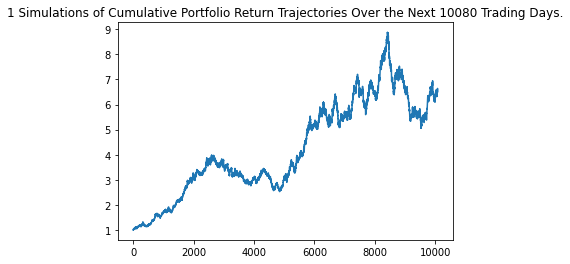

In [35]:
# Visualize the years to retirement Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = output.plot_simulation()

# Step 3: Plot the probability distribution of the Monte Carlo simulation.

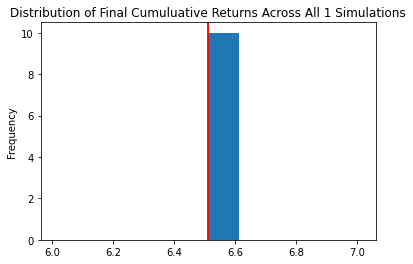

In [36]:
# Visualize the probability distribution of the years to retirement Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = output.plot_distribution()

In [27]:
# Step 4: Generate the summary statistics for the Monte Carlo simulation.
# Generate summary statistics from the {years_to_retirement} Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = simulation.summary_statistics(output)

# Review the {years_to_retirement} Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean             10.793001
std               7.875218
min               0.860722
25%               5.388576
50%               8.943167
75%              14.280796
max              74.057973
95% CI Lower      1.823246
95% CI Upper     29.257758
Name: 10080, dtype: float64


../MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Analyze the Retirement Portfolio Forecasts
Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?

In [28]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the members' portfolio is: ${total_stocks_bonds}")
total_stocks_bonds

The current balance of the stock and bond portion of the members' portfolio is: $40000.0


40000.0

In [29]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
#ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * float(total_stocks_bonds)
#ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * float(total_stocks_bonds)
mean_cumulative_return = simulation.mean_cumulative_return(output, total_stocks_bonds)


# Print the result of your calculations
print(f"The initial investment of ${total_stocks_bonds} in the portfolio"
    f" over the next {years_to_retirement} will end on average"
    f" ${mean_cumulative_return: .2f}.")

The initial investment of $40000.0 in the portfolio over the next 40 will end on average $ 357726.67.


../MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Sum the total forecasted investment with the cash savings to arrive at the reitrement savings amount.

In [30]:
savings_at_retirement = simulation.savings_at_retirement(mean_cumulative_return, savings)
savings_at_retirement

407726.66569642763

In [31]:

import get_cost_of_living_data
import simulation

data, cities = get_cost_of_living_data.cost_of_living_data()
retirement_cities = simulation.get_retirement_cities(output, data, retirement_years, total_stocks_bonds, savings)

print(retirement_cities)



ModuleNotFoundError: No module named 'get_cost_of_living_data'